In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read File

In [2]:
s1=pd.read_csv('Entities.csv')
s1

,location_id,property_type,price,location,city,baths,purpose,bedrooms,agency,agent,Total_Area
0,3325,Flat,10000000,G-10,Islamabad,2,For Sale,2,NaN,NaN,1089.004
1,3236,Flat,6900000,E-11,Islamabad,3,For Sale,3,NaN,NaN,15246.056
2,764,House,16500000,G-15,Islamabad,6,For Sale,5,NaN,NaN,2178.008
3,340,House,43500000,Bani Gala,Islamabad,4,For Sale,4,NaN,NaN,10890.000
4,3226,House,7000000,DHA Defence,Islamabad,3,For Sale,3,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...
168441,6754,House,26500000,Gadap Town,Karachi,0,For Sale,6,Al Shahab Enterprises,Shahmir,26136.096
168442,680,House,12500000,Gadap Town,Karachi,0,For Sale,3,Al Shahab Enterprises,Shahmir,2178.008
168443,6757,House,27000000,Gadap Town,Karachi,0,For Sale,6,Al Shahab Enterprises,Shahmir,26136.096
168444,6752,House,11000000,Gadap Town,Karachi,0,For Sale,3,Al Shahab Enterprises,Shahmir,21235.578


# Avoiding Over Fitting


In [3]:
s2 = s1.drop(['location_id','agency','agent','purpose'],axis='columns')
s2.head(20)

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
5,House,34500000,Ghauri Town,Islamabad,8,8,87120.000
6,House,27000000,Korang Town,Islamabad,8,8,5445.000
7,Flat,7800000,E-11,Islamabad,2,2,16879.562
8,House,50000000,DHA Defence,Islamabad,7,7,5445.000
9,Penthouse,40000000,F-11,Islamabad,5,5,5445.000


# Data Cleaning

# handling null values

<AxesSubplot:>

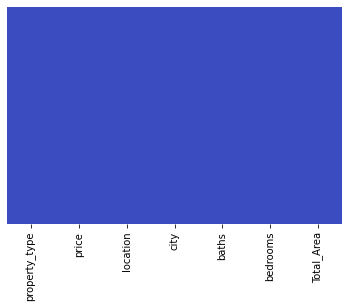

In [4]:
sns.heatmap(s2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [5]:
s2.isnull().sum()

property_type    0
price            0
location         0
city             0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

# If Bedrooms are equal  to 0

In [6]:
s2['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [7]:
condition=s2['bedrooms']==0
s3=s2.drop(index=s2[condition].index)

In [8]:
s3

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


# Remove rare locations

In [9]:
figures = s3['location'].value_counts()

In [10]:
figures 

DHA Defence               20639
Bahria Town Karachi        8258
Bahria Town Rawalpindi     7077
Bahria Town                6100
Gulistan-e-Jauhar          5491
                          ...  
Nussah Town                   1
Beaumont Road                 1
Aiza Garden                   1
Momin Pura                    1
Sundar                        1
Name: location, Length: 1473, dtype: int64

In [11]:
 def less_or_greater(x):
    try:
        if figures>25:
            x=figures
    except:
        return False
    return True

In [12]:
s4=s3[~s3['location'].apply(less_or_greater)]

In [13]:
s4

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


In [14]:
reducedfig = figures [figures<=25]

In [15]:
reducedfig

Munawar Colony     25
KRL Road           25
Gajju Matah        25
Baldia Town        25
Kashmir Highway    25
                   ..
Nussah Town         1
Beaumont Road       1
Aiza Garden         1
Momin Pura          1
Sundar              1
Name: location, Length: 1117, dtype: int64

In [16]:
s4.loc[6264:6500,:]
condition1=s4['location']=='Nussah Town'
print(s4[condition])


Empty DataFrame
Columns: [property_type, price, location, city, baths, bedrooms, Total_Area]
Index: []


C:\Users\ZAINUL~1\AppData\Local\Temp/ipykernel_13164/1270257169.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(s4[condition])


In [17]:
s3.location = s3.location.apply(lambda leftlocation: 'additional' if leftlocation in reducedfig else leftlocation)

In [18]:
s3

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


In [19]:
print("The type is : ", type(reducedfig))

The type is :  <class 'pandas.core.series.Series'>


# Bathroom can not be greater than the bedrooms


In [20]:
condition1=s3['bedrooms']<s3['baths']
s5=s3.drop(index=s3[condition1].index)


In [21]:
s5

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008
5,House,34500000,Ghauri Town,Islamabad,8,8,87120.000
...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578


In [22]:
fig = s5['city'].value_counts()

In [23]:
fig

Karachi       48465
Islamabad     24467
Lahore        23809
Rawalpindi    12698
Faisalabad     2349
Name: city, dtype: int64

In [24]:
s5['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

# Calculating Price per sq ft

In [25]:
s5['price_per_sq_ft']=s5['price']/s5['Total_Area']
s5


,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sq_ft
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9182.702727
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,452.576063
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3994.490358
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3213.945954
5,House,34500000,Ghauri Town,Islamabad,8,8,87120.000,396.005510
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,6,26136.096,1013.923426
168442,House,12500000,Gadap Town,Karachi,0,3,2178.008,5739.189204
168443,House,27000000,Gadap Town,Karachi,0,6,26136.096,1033.054057
168444,House,11000000,Gadap Town,Karachi,0,3,21235.578,517.998615


# Price per sqft should not be less than 1500

In [26]:
conditione=s5['price_per_sq_ft']<1800
s6=s5.drop(index=s5[conditione].index)
s6

conditionet=s6['price_per_sq_ft']>7000
s7=s6.drop(index=s6[conditionet].index)
s7

,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sq_ft
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3994.490358
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3213.945954
6,House,27000000,Korang Town,Islamabad,8,8,5445.000,4958.677686
10,Flat,35000000,Diplomatic Enclave,Islamabad,3,3,19329.821,1810.673777
11,Flat,48000000,Diplomatic Enclave,Islamabad,2,2,21235.578,2260.357594
...,...,...,...,...,...,...,...,...
168409,House,8500000,Zaitoon - New Lahore City,Lahore,3,3,1361.255,6244.237854
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,3,2178.008,3443.513522
168438,House,14000000,Bahria Town Karachi,Karachi,3,3,2178.008,6427.891909
168439,House,14000000,Bahria Town Karachi,Karachi,4,4,3811.514,3673.081091


In [27]:
s8 = s7.drop(['price_per_sq_ft'],axis='columns')
s7
result=s7.groupby('location')
result
for location, data in result:
    print("city:",location)
    print("\n")
    print("data:",data)


city: 7th Avenue


data:       property_type      price    location       city  baths  bedrooms  \
43493         House  150000000  7th Avenue  Islamabad      6         6   

       Total_Area  price_per_sq_ft  
43493     70785.0      2119.093028  
city: Aashiana Road


data:        property_type    price       location    city  baths  bedrooms  \
1621           House  4700000  Aashiana Road  Lahore      3         3   
1647           House  3200000  Aashiana Road  Lahore      2         2   
4100           House  2600000  Aashiana Road  Lahore      2         2   
5647           House  2400000  Aashiana Road  Lahore      2         2   
6521           House  4500000  Aashiana Road  Lahore      2         2   
...              ...      ...            ...     ...    ...       ...   
144383         House  4000000  Aashiana Road  Lahore      3         3   
144409         House  3200000  Aashiana Road  Lahore      1         1   
144410         House  3200000  Aashiana Road  Lahore      1        

data:        property_type     price  location        city  baths  bedrooms  \
322             Flat  16000000  Askari 7  Rawalpindi      0         3   
7618            Flat  16000000  Askari 7  Rawalpindi      3         3   
12224           Flat  18500000  Askari 7  Rawalpindi      3         3   
19689           Flat  14000000  Askari 7  Rawalpindi      3         3   
19705           Flat  14000000  Askari 7  Rawalpindi      3         3   
20012           Flat  11400000  Askari 7  Rawalpindi      0         3   
20013           Flat  18500000  Askari 7  Rawalpindi      0         3   
51657           Flat  12000000  Askari 7  Rawalpindi      3         3   
64917           Flat  11500000  Askari 7  Rawalpindi      0         3   
70967           Flat  15000000  Askari 7  Rawalpindi      0         3   
70968           Flat  11500000  Askari 7  Rawalpindi      0         3   
72282           Flat  11500000  Askari 7  Rawalpindi      0         3   
75535           Flat  11500000  Askari 7  Raw

data:        property_type     price    location    city  baths  bedrooms  \
1342           House   8000000  Canal View  Lahore      3         4   
10570          House  65000000  Canal View  Lahore      5         5   
14096          House  62000000  Canal View  Lahore      6         8   
46346          House  30000000  Canal View  Lahore      5         5   
47431          House  27500000  Canal View  Lahore      4         4   
...              ...       ...         ...     ...    ...       ...   
148821         House  53000000  Canal View  Lahore      5         5   
148822         House  53000000  Canal View  Lahore      5         5   
149323         House  19000000  Canal View  Lahore      5         5   
154120         House  37500000  Canal View  Lahore      4         4   
154121         House  36500000  Canal View  Lahore      4         4   

        Total_Area  price_per_sq_ft  
1342      1633.506      4897.441454  
10570    10890.000      5968.778696  
14096    10890.000      569

data:       property_type     price            location       city  baths  bedrooms  \
10             Flat  35000000  Diplomatic Enclave  Islamabad      3         3   
11             Flat  48000000  Diplomatic Enclave  Islamabad      2         2   
23             Flat  47000000  Diplomatic Enclave  Islamabad      2         3   
614            Flat  46000000  Diplomatic Enclave  Islamabad      2         2   
774            Flat  43000000  Diplomatic Enclave  Islamabad      2         2   
9359           Flat  12500000  Diplomatic Enclave  Islamabad      1         1   
23229          Flat  11000000  Diplomatic Enclave  Islamabad      1         1   
25693          Flat  50000000  Diplomatic Enclave  Islamabad      2         2   
27037          Flat  45000000  Diplomatic Enclave  Islamabad      2         2   
29745          Flat  55000000  Diplomatic Enclave  Islamabad      2         2   
35213          Flat  30000000  Diplomatic Enclave  Islamabad      1         1   
35402          Flat  6

data:        property_type    price        location    city  baths  bedrooms  \
1137           House  9000000  Ferozepur Road  Lahore      5         6   
1651            Flat  2700000  Ferozepur Road  Lahore      0         2   
2268           House  4000000  Ferozepur Road  Lahore      3         3   
3119           House  3400000  Ferozepur Road  Lahore      2         2   
5317           House  8500000  Ferozepur Road  Lahore      8        11   
...              ...      ...             ...     ...    ...       ...   
163062         House  1500000  Ferozepur Road  Lahore      2         2   
167645         House  1600000  Ferozepur Road  Lahore      2         2   
167651         House  1600000  Ferozepur Road  Lahore      2         2   
167653         House  2200000  Ferozepur Road  Lahore      2         2   
167654         House  1600000  Ferozepur Road  Lahore      2         2   

        Total_Area  price_per_sq_ft  
1137      1633.506      5509.621636  
1651      1089.004      2479.

data:        property_type     price           location        city  baths  \
5704           House  15000000  Khayaban Colony 2  Faisalabad      3   
6869           House  15000000  Khayaban Colony 2  Faisalabad      5   
11550          House  20000000  Khayaban Colony 2  Faisalabad      3   
18688          House  11000000  Khayaban Colony 2  Faisalabad      3   
21977          House  23000000  Khayaban Colony 2  Faisalabad      6   
34242          House   7500000  Khayaban Colony 2  Faisalabad      5   
37378          House   8000000  Khayaban Colony 2  Faisalabad      3   
37379          House  16000000  Khayaban Colony 2  Faisalabad      4   
66508          House  20000000  Khayaban Colony 2  Faisalabad      3   
81752          House   4500000  Khayaban Colony 2  Faisalabad      3   
151136         House   7500000  Khayaban Colony 2  Faisalabad      0   
158059         House  22500000  Khayaban Colony 2  Faisalabad      0   
158364         House   7500000  Khayaban Colony 2  Faisala

87798     816.753      4897.441454  
city: Mansoorah


data:       property_type     price   location    city  baths  bedrooms  Total_Area  \
1096          House   8500000  Mansoorah  Lahore      4         4    1361.255   
7726          House   7500000  Mansoorah  Lahore      2         2    1633.506   
12797         House  16000000  Mansoorah  Lahore      9        10    2722.510   
14664         House   5500000  Mansoorah  Lahore      3         3     816.753   
16518         House  12500000  Mansoorah  Lahore      4         5    2722.510   
58667         House   9000000  Mansoorah  Lahore      2         2    1633.506   
73781         House  16000000  Mansoorah  Lahore      4         4    2722.510   

       price_per_sq_ft  
1096       6244.237854  
7726       4591.351363  
12797      5876.929745  
14664      6733.981999  
16518      4591.351363  
58667      5509.621636  
73781      5876.929745  
city: Manzoor Colony


data:        property_type     price        location     city  bath

data:       property_type     price         location    city  baths  bedrooms  \
28473         House  35500000  New Muslim Town  Lahore      0         7   

       Total_Area  price_per_sq_ft  
28473      5445.0      6519.742883  
city: New Super Town


data:       property_type     price        location    city  baths  bedrooms  \
3714          House  20000000  New Super Town  Lahore      6         6   
28168         House  27000000  New Super Town  Lahore      5         5   

       Total_Area  price_per_sq_ft  
3714     4083.765      4897.441454  
28168    4356.016      6198.324340  
city: Nisar Colony


data:       property_type     price      location        city  baths  bedrooms  \
7915          House   8500000  Nisar Colony  Faisalabad      2         3   
8158          House   4400000  Nisar Colony  Faisalabad      2         2   
10254         House   4500000  Nisar Colony  Faisalabad      2         4   
10582         House   8000000  Nisar Colony  Faisalabad      3         5   

data:        property_type     price                     location    city  baths  \
4747           House  10000000  Punjab Govt Servant Society  Lahore      2   
5346           House   7000000  Punjab Govt Servant Society  Lahore      0   
5353           House   6500000  Punjab Govt Servant Society  Lahore      2   
9279           House  12000000  Punjab Govt Servant Society  Lahore      2   
10209          House   6600000  Punjab Govt Servant Society  Lahore      2   
11148          House   7000000  Punjab Govt Servant Society  Lahore      2   
11845          House   6500000  Punjab Govt Servant Society  Lahore      2   
12513          House   7800000  Punjab Govt Servant Society  Lahore      2   
13403          House   7200000  Punjab Govt Servant Society  Lahore      2   
14999          House  13000000  Punjab Govt Servant Society  Lahore      3   
17154          House  12500000  Punjab Govt Servant Society  Lahore      3   
21744          House   8500000  Punjab Govt Servant Societ

151619      6978.854072  
city: Shadman 2


data:        property_type     price   location     city  baths  bedrooms  \
16678           Flat   7000000  Shadman 2  Karachi      2         3   
139831         House  27500000  Shadman 2  Karachi      7         9   

        Total_Area  price_per_sq_ft  
16678     1089.004      6427.891909  
139831   13068.048      2104.369375  
city: Shah Faisal Town


data:         property_type     price          location     city  baths  bedrooms  \
1733            House  20000000  Shah Faisal Town  Karachi      3         5   
8007    Upper Portion   5500000  Shah Faisal Town  Karachi      0         2   
11248            Flat   3200000  Shah Faisal Town  Karachi      2         2   
11350   Upper Portion  12000000  Shah Faisal Town  Karachi      3         3   
15703            Flat   4500000  Shah Faisal Town  Karachi      2         2   
20451           House   7500000  Shah Faisal Town  Karachi      4         5   
22124   Upper Portion   5000000  Shah 

data:        property_type     price            location    city  baths  bedrooms  \
13786          House  20500000  Sukh Chayn Gardens  Lahore      5         6   
14065          House  17500000  Sukh Chayn Gardens  Lahore      4         4   
56948          House  19000000  Sukh Chayn Gardens  Lahore      5         5   
103386         House  18000000  Sukh Chayn Gardens  Lahore      4         4   
134585         House  17500000  Sukh Chayn Gardens  Lahore      5         5   

        Total_Area  price_per_sq_ft  
13786     3539.263      5792.166335  
14065     2722.510      6427.891909  
56948     2722.510      6978.854072  
103386    2722.510      6611.545963  
134585    2722.510      6427.891909  
city: Sunfort Gardens


data:        property_type    price         location    city  baths  bedrooms  \
108011         House  9500000  Sunfort Gardens  Lahore      3         3   
119185         House  9500000  Sunfort Gardens  Lahore      3         3   
131681         House  9500000  Sunfo

data:        property_type     price   location        city  baths  bedrooms  \
4299           House  20000000  Westridge  Rawalpindi      4         5   
5976           House  25000000  Westridge  Rawalpindi      5         5   
15881          House  15000000  Westridge  Rawalpindi      4         4   
16576          House  22500000  Westridge  Rawalpindi      4         4   
17207          House  36000000  Westridge  Rawalpindi      6         6   
24156          House  26500000  Westridge  Rawalpindi      4         4   
29878          House   9000000  Westridge  Rawalpindi      3         3   
39899          House  17000000  Westridge  Rawalpindi      3         3   
53952          House  22000000  Westridge  Rawalpindi      3         4   
60639          House  52500000  Westridge  Rawalpindi      4         4   
62706          House  43000000  Westridge  Rawalpindi      5         5   
82499          House   7000000  Westridge  Rawalpindi      0         4   
82506          House   7000000  

In [28]:
result.max()
s7['price_per_sq_ft'].mean()

4946.663127196015

# Using Dummies columns

In [29]:
var = pd.get_dummies(s8.location)
var

mix = pd.concat([s8,var],axis='columns')
mix

change = mix.drop(['location'], axis='columns')
change

,property_type,price,city,baths,bedrooms,Total_Area,7th Avenue,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,...,Walton Road,Wapda City,Wapda Town,Westridge,Yousaf Colony,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,additional
3,House,43500000,Islamabad,4,4,10890.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,House,7000000,Islamabad,3,3,2178.008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,House,27000000,Islamabad,8,8,5445.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Flat,35000000,Islamabad,3,3,19329.821,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Flat,48000000,Islamabad,2,2,21235.578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168409,House,8500000,Lahore,3,3,1361.255,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
168435,Flat,7500000,Karachi,3,3,2178.008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168438,House,14000000,Karachi,3,3,2178.008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168439,House,14000000,Karachi,4,4,3811.514,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
var1 = pd.get_dummies(change.city)
var1
mix1 = pd.concat([change,var1],axis='columns')
mix1
change1 = mix1.drop(['city'],axis='columns')
#change1 = mix1.drop(, axis='columns')
change1

,property_type,price,baths,bedrooms,Total_Area,7th Avenue,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,...,Zaheer Villas,Zaitoon - New Lahore City,Zamzama,Zaraj Housing Scheme,additional,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
3,House,43500000,4,4,10890.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,House,7000000,3,3,2178.008,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,House,27000000,8,8,5445.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,Flat,35000000,3,3,19329.821,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,Flat,48000000,2,2,21235.578,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168409,House,8500000,3,3,1361.255,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
168435,Flat,7500000,3,3,2178.008,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
168438,House,14000000,3,3,2178.008,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
168439,House,14000000,4,4,3811.514,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
var2 = pd.get_dummies(change1.property_type)
var2

mix2 = pd.concat([change1,var2],axis='columns')
mix2
change2 = mix2.drop(['property_type'], axis='columns')
change2

,price,baths,bedrooms,Total_Area,7th Avenue,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,...,Karachi,Lahore,Rawalpindi,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
3,43500000,4,4,10890.000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000000,3,3,2178.008,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,27000000,8,8,5445.000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,35000000,3,3,19329.821,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,48000000,2,2,21235.578,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168409,8500000,3,3,1361.255,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
168435,7500000,3,3,2178.008,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
168438,14000000,3,3,2178.008,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
168439,14000000,4,4,3811.514,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [32]:

X = change2.drop(['price'],axis='columns')
X.head(3)
y = change2.price
y.head(3)


3    43500000
4     7000000
6    27000000
Name: price, dtype: int64

In [33]:
change2

,price,baths,bedrooms,Total_Area,7th Avenue,Aashiana Road,Abdalians Cooperative Housing Society,Abul Hassan Isphani Road,Adiala Road,Afshan Colony,...,Karachi,Lahore,Rawalpindi,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
3,43500000,4,4,10890.000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000000,3,3,2178.008,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,27000000,8,8,5445.000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,35000000,3,3,19329.821,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,48000000,2,2,21235.578,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168409,8500000,3,3,1361.255,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
168435,7500000,3,3,2178.008,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
168438,14000000,3,3,2178.008,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
168439,14000000,4,4,3811.514,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [44]:
change2.to_csv("hello.csv")

# Training Data

In [34]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
model.fit(X,y)

LinearRegression()

In [36]:
model.score(X,y)

0.9213774444600723

In [37]:

X = change2.drop(['price'],axis='columns')
X.head(3)
y = change2.price
y.head(3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [38]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.901770403031034

In [39]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-1.23343611e+09,  8.75344549e-01,  8.76313066e-01,  8.84539170e-01,
        8.80917487e-01])

In [40]:
def predict_price(city,Total_Area,baths,bedrooms):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Total_Area
    x[1] = baths
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [41]:
predict_price('G-10',1089.004, 2, 2)

C:\Users\Zain Ul Abidin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109058002.99919319

In [42]:
import pickle
#Saving the data model
with open('saved_model.pkl','wb') as store:
    pickle.dump(change2,store)
#Load Saved Model
#with open('model_pickle','rb') as file:
 #   mp = pickle.load(file)

In [43]:
X.columns

Index(['baths', 'bedrooms', 'Total_Area', '7th Avenue', 'Aashiana Road',
       'Abdalians Cooperative Housing Society', 'Abul Hassan Isphani Road',
       'Adiala Road', 'Afshan Colony', 'Airline Housing Society',
       ...
       'Karachi', 'Lahore', 'Rawalpindi', 'Farm House', 'Flat', 'House',
       'Lower Portion', 'Penthouse', 'Room', 'Upper Portion'],
      dtype='object', length=359)